## PCA model

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def return_result(y_true, y_pred):
    performance = {}
    performance['acc'] = accuracy_score(y_true=y_true, y_pred=y_pred)
    performance['precision_score'] = precision_score(y_true=y_true,y_pred=y_pred)
    performance['recall_score'] = recall_score(y_true=y_true,y_pred=y_pred)
    performance['f1_score'] = f1_score(y_true=y_true,y_pred=y_pred)
    
    return performance

def cf_vis(y_true, y_pred):
    cf = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,8))
    sns.heatmap(cf, annot=True, fmt='d', cmap='Pastel1')
    
    return cf

In [47]:
data = pd.read_csv('./anomaly_dataset.csv')

In [48]:
data

,Velocity,Direction,label
0,0.265570,4.227153,0
1,0.300980,3.628604,0
2,0.171430,2.784595,0
3,0.319400,3.400146,0
4,0.216679,3.591772,0
...,...,...,...
18030,0.231716,2.996458,0
18031,0.118288,3.533865,0
18032,0.160724,3.785585,0
18033,0.130927,3.427468,0


In [49]:
data = data.sort_values(by='label')
data = data.reset_index(drop=True)

In [50]:
data

,Velocity,Direction,label
0,0.265570,4.227153,0
1,0.164145,3.029955,0
2,0.126235,2.731753,0
3,0.176324,3.829839,0
4,0.133068,3.754392,0
...,...,...,...
18030,4.171711,4.430516,1
18031,12.059835,4.269800,1
18032,4.137699,4.474006,1
18033,7.814695,4.788406,1


In [51]:
X = data.iloc[len(data) - 18035:-1, :-1]
y = data.iloc[len(data) - 18035:-1, -1]

In [52]:
X_train1 = X[:int(0.8*len(X1))]
X_test1 = X[int(0.8*len(X1)):]
y_train1 = y[:int(0.8*len(y1))]
y_test1 = y[int(0.8*len(y1)):]

print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(14427, 2)
(3607, 2)
(14427,)
(3607,)


In [53]:
pca_2d = PCA(n_components = 2)

In [54]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns[:2])
X_scaled_df.reset_index(drop = True)
X.iloc[:, :] = X_scaled_df

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

result_2d = pca_2d.fit_transform(X)

In [55]:
pc1_2d = result_2d[:,0]
pc2_2d = result_2d[:,1]

pca_df_2d = pd.DataFrame(columns=['pc1', 'pc2', 'label'])
pca_df_2d['pc1'] = pc1_2d
pca_df_2d['pc2'] = pc2_2d
pca_df_2d['label'] = y 

In [56]:
pca_df_2d

,pc1,pc2,label
0,0.879618,-1.093554,0
1,-0.298937,-0.037858,0
2,-0.600155,0.217438,0
3,0.454824,-0.776866,0
4,0.358224,-0.732664,0
...,...,...,...
18029,8.071019,5.946703,1
18030,3.435196,1.082502,1
18031,8.062799,6.010039,1
18032,3.455178,1.021322,1


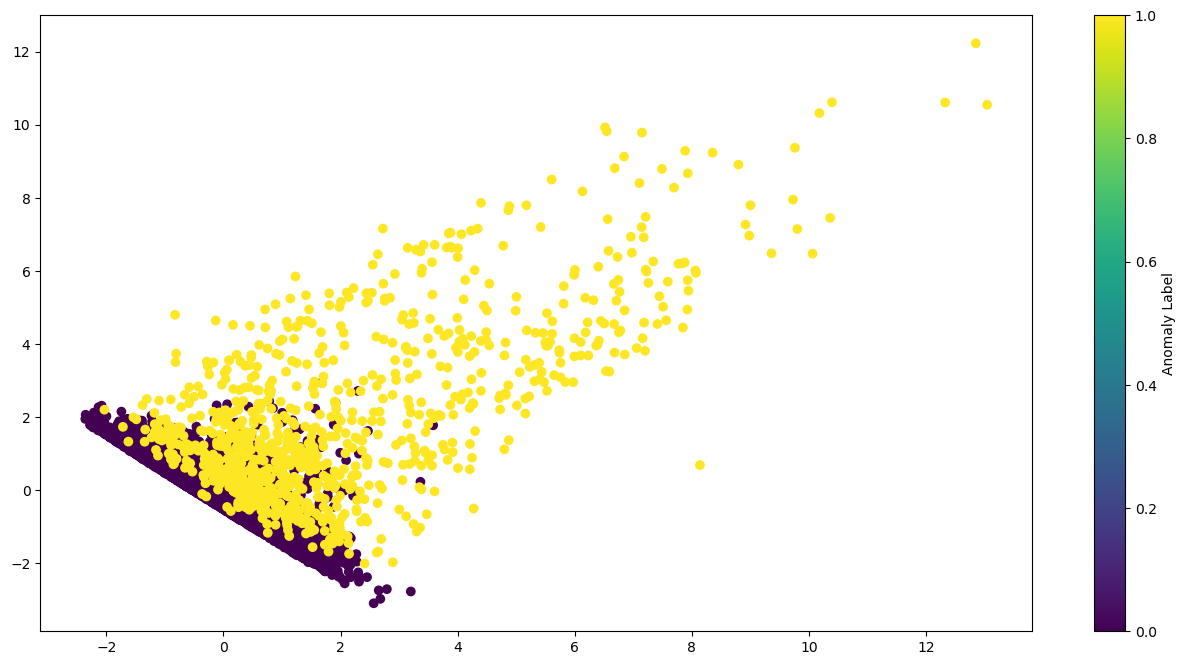

In [57]:
plt.figure(figsize = (16, 8))
plt.scatter(pca_df_2d['pc1'], pca_df_2d['pc2'], c=pca_df_2d['label'])
plt.colorbar(label='Anomaly Label')

In [58]:
# 2D에 대한 Reconstruction 진행
proj_2d = pca_2d.inverse_transform(result_2d)
proj_2d_df = pd.DataFrame(proj_2d, columns = data.columns[:2])

proj_2d_df

,Velocity,Direction
0,-0.151276,1.395243
1,-0.238150,-0.184611
2,-0.270622,-0.578126
3,-0.227718,0.870937
4,-0.264769,0.771375
...,...,...
18029,9.912027,1.502118
18030,3.194496,1.663606
18031,9.950999,1.451520
18032,3.165363,1.720996


In [59]:
diff = proj_2d_df - X

In [60]:
diff

,Velocity,Direction
0,-6.161738e-15,-3.108624e-15
1,-2.775558e-17,-4.635181e-15
2,5.551115e-17,-1.110223e-16
3,-1.942890e-16,1.110223e-16
4,-3.330669e-16,2.220446e-16
...,...,...
18029,0.000000e+00,-1.332268e-15
18030,0.000000e+00,-8.881784e-16
18031,1.776357e-15,-2.220446e-16
18032,4.440892e-16,-4.440892e-16


In [61]:
diff = diff.pow(2)
diff['y_true'] = y

diff

,Velocity,Direction,y_true
0,3.796701e-29,9.663546e-30,0
1,7.703720e-34,2.148490e-29,0
2,3.081488e-33,1.232595e-32,0
3,3.774823e-32,1.232595e-32,0
4,1.109336e-31,4.930381e-32,0
...,...,...,...
18029,0.000000e+00,1.774937e-30,1
18030,0.000000e+00,7.888609e-31,1
18031,3.155444e-30,4.930381e-32,1
18032,1.972152e-31,1.972152e-31,1


In [62]:
sum_list = list((diff.sum(axis=1)).values)

In [63]:
y_pred_list = []

for item in sum_list:
    if item > np.percentile(sum_list, 95):
        y_pred_list.append(1)
    else:
        y_pred_list.append(0)

diff['y_pred'] = y_pred_list

acc : 0.9469890207386048
precision_score : 0.0
recall_score : 0.0
f1_score : 0.0


C:\Users\OSY\anaconda3\envs\osy\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[17078,     0],
       [  956,     0]], dtype=int64)

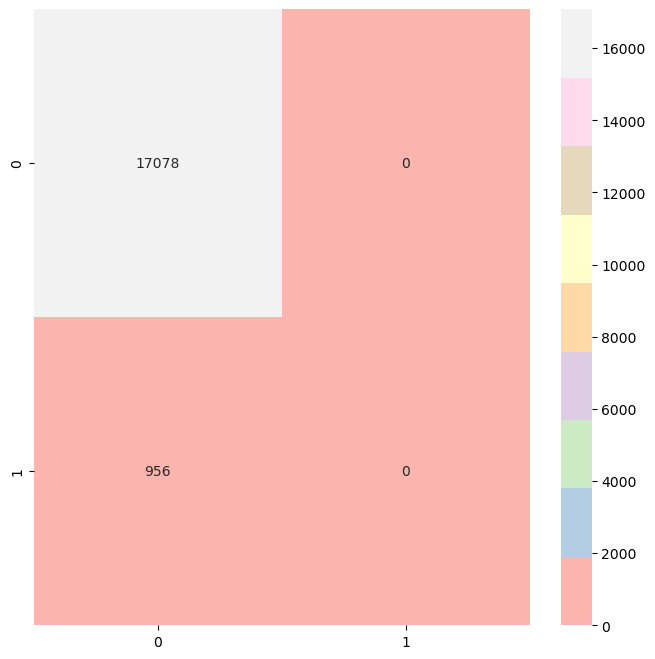

In [64]:
performance = return_result(y, y_pred_list)

for k, v in performance.items():
    print(k, ':', v)

cf_vis(y, y_pred_list)